In [123]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import mpl_finance
from mpl_finance import candlestick_ohlc

import numpy as np
import urllib
import datetime as dt
import csv


In [124]:

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    



In [125]:
def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    #source_code = open('BRML3.csv','rb')
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    #plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

<IPython.core.display.Javascript object>


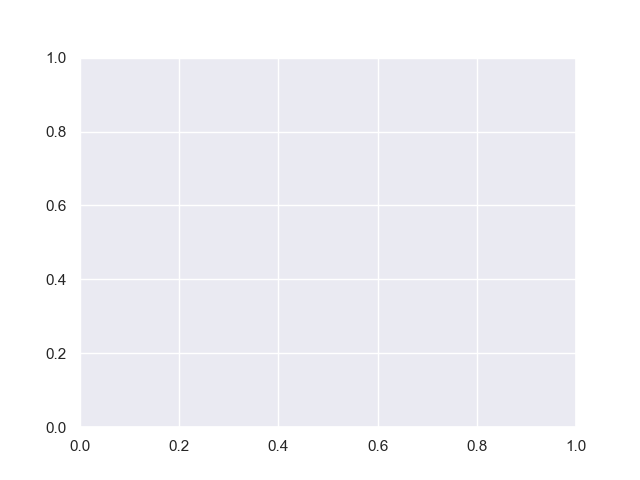

AttributeError: '_io.BufferedReader' object has no attribute 'split'

In [126]:
graph_data('BRML3')

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Set 21 09:11:31 2018

@author:Eduardo S. Sales
Universidade de Brasilia - UnB
"""
%matplotlib notebook 
#import plotly.plotly as py
#import plotly.graph_objs as go
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
#import urllib
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
import datetime as dt
import seaborn as sns
sns.set()

In [9]:
def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()        
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

# Índices da Carteira IMOB
def read(symbol):
    Stock=[symbol]
    Stock=[Stock[k]+'.SA' for k in range(len(Stock))]

    N_months=24
    today = dt.date.today()
    E_Day = today.day; E_Month = today.month; E_Year = today.year
    day_before=today - dt.timedelta(days=N_months*365/12)
    S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

    stocks_all=yahoo(Stock,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
    return stocks_all

In [16]:
dfBRML3 = read('BRML3').fillna(0)
dfMRVE3 = read('MRVE3').fillna(0)
dfMULT3 = read('MULT3').fillna(0)
dfCYRE3 = read('CYRE3').fillna(0)
dfHBOR3 = read('HBOR3').fillna(0)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [92]:
dfBRML3.to_csv('BRML3.csv')
dfMRVE3.to_csv('MRVE3.csv')
dfMULT3.to_csv('MULT3.csv')
dfCYRE3.to_csv('CYRE3.csv')
dfHBOR3.to_csv('HBOR3.csv')

dfBRML3 = pd.read_csv('BRML3.csv', parse_dates=True, index_col=1)
dfMRVE3 = pd.read_csv('MRVE3.csv', parse_dates=True, index_col=1)
dfMULT3 = pd.read_csv('MULT3.csv', parse_dates=True, index_col=1)
dfCYRE3 = pd.read_csv('CYRE3.csv', parse_dates=True, index_col=1)
dfHBOR3 = pd.read_csv('HBOR3.csv', parse_dates=True, index_col=1) 

dfHBOR3.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2016-10-03,0,1.99506,1.99506,1.89915,1.94711,1.94711,507629
2016-10-04,1,1.94711,1.95670,1.86078,1.87996,1.87996,954163
2016-10-05,2,1.87996,1.88956,1.82241,1.83201,1.83201,749401
2016-10-06,3,1.84160,1.89915,1.82241,1.87996,1.87996,566638
2016-10-07,4,1.88956,1.88956,1.83201,1.84160,1.84160,566430


In [95]:
#dfHBOR3.drop('Unnamed: 0',axis=1)
dfBRML3.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2016-10-03,0,10.6435,11.1304,10.6435,10.9565,10.897109,7689935
2016-10-04,1,10.9130,11.0522,10.7565,10.9913,10.931720,7061000
2016-10-05,2,11.0435,11.1652,10.9391,11.0956,11.035455,3243345
2016-10-06,3,11.0435,11.0435,10.9130,11.0261,10.966331,4269375
2016-10-07,4,11.0783,11.3217,10.8783,11.2609,11.199859,10179685


In [103]:
dfMRVE3 = pd.read_csv('MRVE3.csv', parse_dates=True, index_col=0)
dfMRVE3.drop('Unnamed: 0',axis=1)
dfMRVE3.head()

,Unnamed: 0,Unnamed: 0.1,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,
2016-10-03,0,0,12.04,12.04,11.78,11.95,11.140002,1315500
2016-10-04,1,1,11.95,12.13,11.73,11.88,11.074748,1371500
2016-10-05,2,2,11.92,12.22,11.92,12.08,11.261191,2063900
2016-10-06,3,3,12.09,12.11,11.93,12.07,11.251868,981600
2016-10-07,4,4,12.14,12.30,12.01,12.18,11.354414,2821000


In [112]:
ohlc_BRML3 = dfBRML3['Adj Close'].resample('10D').ohlc()
ohlc_MRVE3 = dfMRVE3['Adj Close'].resample('10D').ohlc()
ohlc_MULT3 = dfMULT3['Adj Close'].resample('10D').ohlc()
ohlc_CYRE3 = dfCYRE3['Adj Close'].resample('10D').ohlc()
ohlc_HBOR3 = dfHBOR3['Adj Close'].resample('10D').ohlc()

volume_BRML3 = dfBRML3['Volume'].resample('10D').sum()
volume_MRVE3 = dfMRVE3['Volume'].resample('10D').sum()
volume_MULT3 = dfMULT3['Volume'].resample('10D').sum()
volume_CYRE3 = dfCYRE3['Volume'].resample('10D').sum()
volume_HBOR3 = dfHBOR3['Volume'].resample('10D').sum()

In [113]:
ohlc_BRML3

,open,high,low,close
Date,,,,
2016-10-03,10.897109,11.199859,10.897109,11.052760
2016-10-13,11.147942,11.822565,11.087373,11.666814
2016-10-23,11.692773,11.692773,10.724152,10.724152
2016-11-02,10.456013,10.776069,9.219323,9.219323
2016-11-12,9.124182,9.271211,9.124182,9.271211
2016-11-22,9.219323,9.392290,8.951215,8.951215
2016-12-02,9.141478,9.340393,9.132834,9.340393
2016-12-12,9.383637,9.729582,9.227966,9.556615
2016-12-22,9.772826,10.334972,9.772826,10.334972


In [110]:
#ohlc_BRML3.reset_index(inplace=True)
ohlc_BRML3['Date']=ohlc_BRML3['Date'].map(mdates.date2num)

KeyError: 'Date'

In [115]:
ohlc_BRML3.head()

,open,high,low,close
Date,,,,
2016-10-03,10.897109,11.199859,10.897109,11.052760
2016-10-13,11.147942,11.822565,11.087373,11.666814
2016-10-23,11.692773,11.692773,10.724152,10.724152
2016-11-02,10.456013,10.776069,9.219323,9.219323
2016-11-12,9.124182,9.271211,9.124182,9.271211


In [116]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, ohlc_BRML3.values, width=2, colorup='g')
ax2.fill_between(volume_BRML3.index.map(mdates.date2num), volume_BRML3.values, 0)
plt.show()

<IPython.core.display.Javascript object>

ValueError: not enough values to unpack (expected 5, got 4)

In [ ]:
stocks_all.head()
stock=pd.concat([stocks_all.Open[Stock[0]], stocks_all.High[Stock[0]], stocks_all.Low[Stock[0]], stocks_all.Close[Stock[0]],stocks_all.Volume[Stock[0]]], axis=1) 
stock.columns=['Open','High','Low','Close','Volume']
stock.head()

In [ ]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

date = stock.index
openp = stock['Open']
closep = stock['Close']
highp = stock['High']
lowp = stock['Low']
volume = stock['Volume']

x = 0
y = len(date)
ohlc = []

while x < y:
    append_me = date[x], openp[x], highp[x], lowp[x], closep[x]
    ohlc.append(append_me)
    x+=1

candlestick_ohlc(ax1, stock, width=0.4, colorup='#77d879', colordown='#db3f3f')

In [ ]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))



candlestick_ohlc(ax1, stock, width=0.4, colorup='#77d879', colordown='#db3f3f')

In [ ]:
stocks_all['Open']